In [1]:
# import requests

# ipynb_txt = requests.get('https://lightning.ai/docs/pytorch/stable/notebooks/course_UvA-DL/01-introduction-to-pytorch.ipynb').text

# with open('./src/01-introduction-to-pytorch.ipynb', 'wb') as f:
#     f.write(ipynb_txt.encode('utf-8'))

In [2]:
import time

import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib_inline.backend_inline
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as data
from matplotlib.colors import to_rgba
from torch import Tensor
from tqdm.notebook import tqdm  # taqadum Progress bar

matplotlib_inline.backend_inline.set_matplotlib_formats("svg", "pdf")  # For export
print(torch.__version__)

2.0.1+cu118


# intro to PyTorch

In [3]:
torch.manual_seed(42)       # seed : experiment reproducibility

In [4]:
x = Tensor(2, 3, 4)
print(x)
print(x.size())

"""
torch.zeros
torch.ones
torch.rand
torch.randn
torch.arange
"""

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
torch.Size([2, 3, 4])


'\ntorch.zeros\ntorch.ones\ntorch.rand\ntorch.randn\ntorch.arange\n'

In [5]:
# Create a tensor from a (nested) list
x = Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [6]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])
Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


In [7]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])
X2 tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]])
Y tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])


In [8]:
x = torch.arange(6)
print("X", x)

x = x.view(2, 3)
print("X", x)

x = x.permute(1, 0)  # Swapping dimension 0 and 1
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])
X tensor([[0, 1, 2],
        [3, 4, 5]])
X tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [9]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [10]:
print(x[:, 1])  # Second column
print(x[0, :])  # First row
print(x[0, 2])

tensor([1, 5, 9])
tensor([0, 1, 2, 3])
tensor(2)


In [11]:
x = torch.ones((3,))
print(x.requires_grad)
x.requires_grad_(True)
print(x.requires_grad)

False
True


# first linear model (classifier)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import random
import seaborn as sns
import numpy as np
SEED = 42

np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)

In [13]:
songPopularity = pd.read_csv('./data/song_data.csv')

features = ['song_duration_ms', 
            'acousticness', 'danceability', 
            'energy', 'instrumentalness', 
            'key', 'liveness', 'loudness', 
            'audio_mode', 'speechiness', 
            'tempo', 'time_signature', 'audio_valence']

target = 'song_popularity'

songPopularityFeatures = songPopularity[features]
# # perform min max normalization
# songPopularityFeatures = (songPopularityFeatures - songPopularityFeatures.min()) / (songPopularityFeatures.max() - songPopularityFeatures.min())

songPopularityTarget = songPopularity[target]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(songPopularityFeatures, songPopularityTarget, test_size=0.2, random_state=SEED)

In [15]:
def dataframe_to_tensor(df):
    return torch.tensor(df.values, dtype=torch.float32)

# Transform DataFrames into PyTorch tensors using the function
X_train = dataframe_to_tensor(X_train)
X_test = dataframe_to_tensor(X_test)
y_train = dataframe_to_tensor(y_train)
y_test = dataframe_to_tensor(y_test)

In [16]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    '''
    Torch Module class.
    Initializes weight randomly and gets trained via train method.
    '''

    # ! OBLIGATORY
    def __init__(self, optimizer):
        super().__init__()
        
        self.optimizer = optimizer

        # Initialize Weights and Bias
        self.weights = nn.Parameter(
            torch.randn(1, 13, dtype=torch.float),
            requires_grad=True)

        self.bias = nn.Parameter(
            torch.randn(1, 13, dtype=torch.float),
            requires_grad=True
        )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return (self.weights * x + self.bias).sum(axis=1)
    
    # ! CUSTOM

    def trainModel(
            self,
            epochs: int,
            X_train: torch.Tensor,
            X_test: torch.Tensor,
            y_train: torch.Tensor,
            y_test: torch.Tensor,
            lr: float
    ):
        '''
        Trains linear model using pytorch.
        Evaluates the model against test set for every epoch.
        '''
        # Create empty loss lists to track values
        self.train_loss_values = []
        self.test_loss_values = []

        loss_fn = nn.L1Loss()       # L1 Loss function formula: |y_pred - y_true|

        if self.optimizer == 'SGD':
            optimizer = torch.optim.SGD(
                params=self.parameters(),
                lr=lr
            )
        elif self.optimizer == 'Adam':
            optimizer = torch.optim.Adam(
                params=self.parameters(),
                lr=lr
            )

        for epoch in range(epochs):
            self.train()

            y_pred = self(X_train)      # call forward method
            loss = loss_fn(y_pred, y_train)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Set the model in evaluation mode
            self.eval()
            with torch.inference_mode():
                self.evaluate(X_test, y_test, epoch, loss_fn, loss)

    def evaluate(self, X_test, y_test, epoch_nb, loss_fn, train_loss):
        '''
        Evaluates current epoch performance on the test set.
        '''
        test_pred = self(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
        if epoch_nb % 10 == 0:
            self.train_loss_values.append(train_loss.detach().numpy())
            self.test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch_nb} - MAE Train Loss: {train_loss} - MAE Test Loss: {test_loss} ")

    def plot_train_test_error(self):
        '''
        Plots the train and test error.
        '''
        plt.figure(figsize=(12, 8))
        plt.plot(self.train_loss_values, label='Train Loss')
        plt.plot(self.test_loss_values, label='Test Loss')
        plt.legend()
        plt.show()


Epoch: 0 - MAE Train Loss: 73599.828125 - MAE Test Loss: 72842.4375 
Epoch: 10 - MAE Train Loss: 71412.984375 - MAE Test Loss: 70671.65625 
Epoch: 20 - MAE Train Loss: 69226.15625 - MAE Test Loss: 68500.890625 
Epoch: 30 - MAE Train Loss: 67039.328125 - MAE Test Loss: 66330.1171875 
Epoch: 40 - MAE Train Loss: 64852.4765625 - MAE Test Loss: 64159.3359375 
Epoch: 50 - MAE Train Loss: 62665.6328125 - MAE Test Loss: 61988.56640625 
Epoch: 60 - MAE Train Loss: 60478.80078125 - MAE Test Loss: 59817.796875 
Epoch: 70 - MAE Train Loss: 58291.95703125 - MAE Test Loss: 57647.01953125 
Epoch: 80 - MAE Train Loss: 56105.11328125 - MAE Test Loss: 55476.25 
Epoch: 90 - MAE Train Loss: 53918.265625 - MAE Test Loss: 53305.46484375 
Epoch: 100 - MAE Train Loss: 51731.3984375 - MAE Test Loss: 51134.65625 
Epoch: 110 - MAE Train Loss: 49544.52734375 - MAE Test Loss: 48963.84765625 
Epoch: 120 - MAE Train Loss: 47357.6484375 - MAE Test Loss: 46793.04296875 
Epoch: 130 - MAE Train Loss: 45170.7734375 - MA

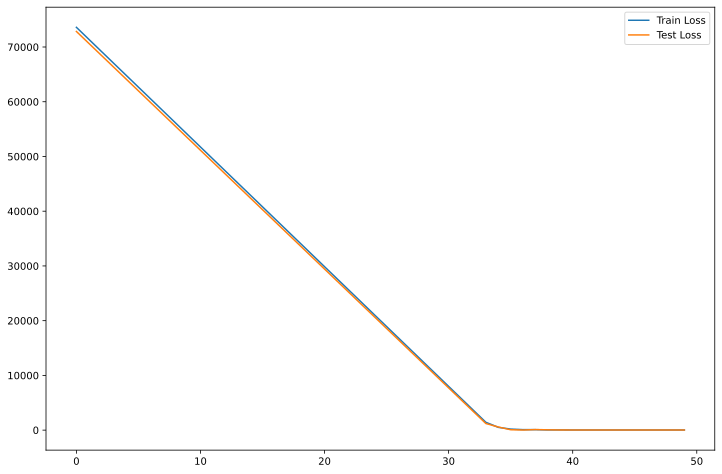

In [17]:
adam_model = LinearRegressionModel('Adam')

adam_model.trainModel(500, X_train, X_test, y_train, y_test, 0.001)
adam_model.plot_train_test_error()  

In [18]:
# sgd_model = LinearRegressionModel('SGD')
# sgd_model.trainModel(500, X_train, X_test, y_train, y_test, 0.001)
# sgd_model.plot_train_test_error()

# continuous XOR

<center style="width: 100%"><img src="https://github.com/Lightning-AI/lightning-tutorials/raw/main/course_UvA-DL/01-introduction-to-pytorch/continuous_xor.svg" width="350px"></center>

In [19]:
class SimpleClassifier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
# Printing a module shows all its submodules
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [20]:
import torch.utils.data as data

class XORDataset(data.Dataset):
    def __init__(self, size, std=0.1):
        """XORDataset.

        Args:
            size: Number of data points we want to generate
            std: Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    # ! OBLIGATORY
    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [21]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))     # __len__
print("Data point 0:", dataset[0])        # __getitem__

Size of dataset: 200
Data point 0: (tensor([1.1196, 0.8694]), tensor(0))


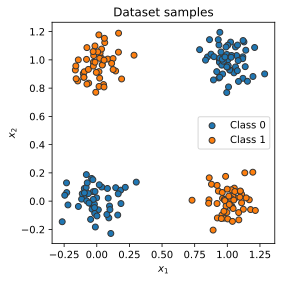

In [22]:
def visualize_samples(data, label):
    if isinstance(data, Tensor):
        data = data.cpu().numpy()
    if isinstance(label, Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

visualize_samples(dataset.data, dataset.label)
plt.show()

In [23]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

$$\mathcal{L}_{BCE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$$


In [24]:
loss_module = nn.BCEWithLogitsLoss()

In [25]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [26]:
train_dataset = XORDataset(size=1000)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [27]:
# Push model to device. Has to be only done once
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [28]:
@torch.no_grad()  # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, Tensor):
        data = data.cpu().numpy()
    if isinstance(label, Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = Tensor(to_rgba("C0")).to(device)
    c1 = Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2)  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    # Specifying "None" in a dimension creates a new one
    output_image = (1 - preds) * c0[None, None] + preds * c1[None, None]
    output_image = (
        output_image.cpu().numpy()
    )  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin="lower", extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)


def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train()

    # Training loop
    train_loss = []
    for epoch in tqdm(range(num_epochs)):
        accum_loss = 0
        for data_inputs, data_labels in data_loader:
            # Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            # Step 2: Run the model on the input data
            preds = model(data_inputs)  # This will call the forward function, implemented above
            preds = preds.squeeze(dim=1)  # Output is [Batch size, 1], but we want [Batch size]

            # Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            # Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            # Step 5: Update the parameters
            optimizer.step()

            accum_loss += loss.item()

        # print(f"Epoch {epoch + 1}/{num_epochs}. Avg Loss: {accum_loss / len(data_loader):6.5f}")
        train_loss.append(accum_loss / len(data_loader))

        if epoch % 25 == 0:
            visualize_classification(model, train_dataset.data, train_dataset.label)
            plt.show()
    
    return train_loss

  0%|          | 0/250 [00:00<?, ?it/s]

c:\Users\jeff1\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


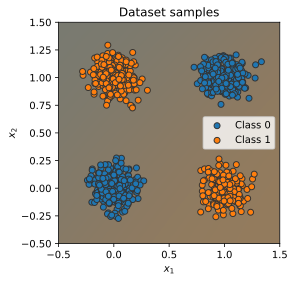

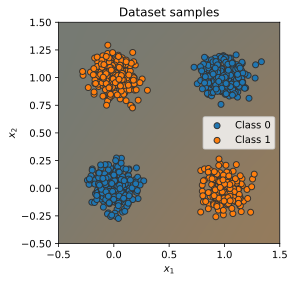

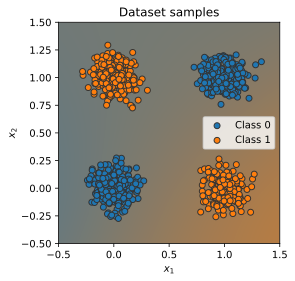

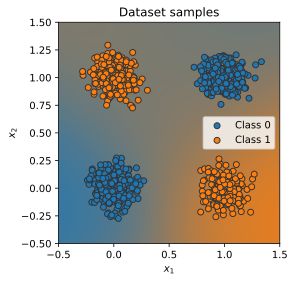

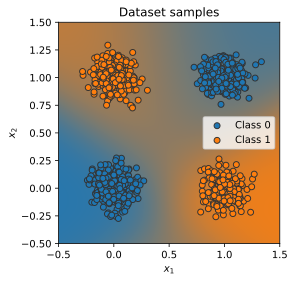

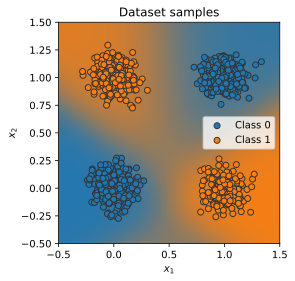

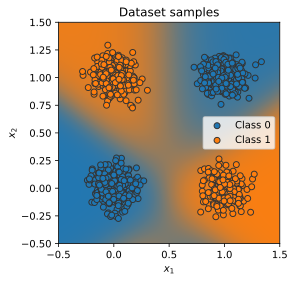

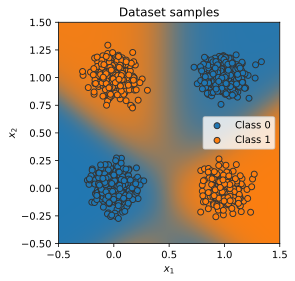

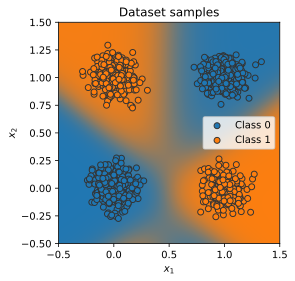

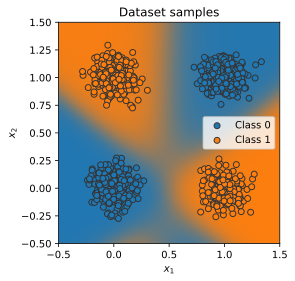

In [29]:
train_loss = train_model(model, optimizer, train_data_loader, loss_module, num_epochs=250)

In [30]:
train_loss[-1]

0.033924981486052275

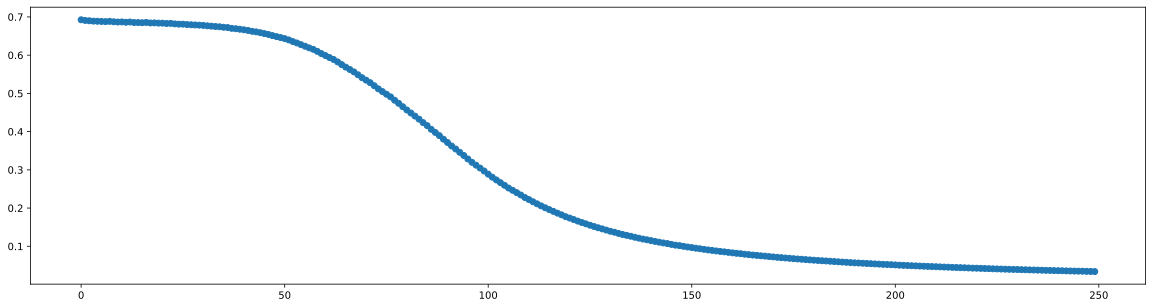

In [31]:
plt.figure(figsize=(20, 5))
plt.plot(train_loss, label="Train loss", color="C0", marker="o")

In [32]:
state_dict = model.state_dict()
print(state_dict)

# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.tar")

OrderedDict([('linear1.weight', tensor([[-3.1450,  2.6300],
        [-0.1649,  2.6741],
        [ 3.1853,  2.7417],
        [ 1.4925, -0.8928]], device='cuda:0')), ('linear1.bias', tensor([-1.3225, -1.1287, -1.1541,  0.6495], device='cuda:0')), ('linear2.weight', tensor([[ 3.8330, -3.9145,  4.6066, -0.8458]], device='cuda:0')), ('linear2.bias', tensor([-0.1087], device='cuda:0'))])


In [33]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[-3.1450,  2.6300],
        [-0.1649,  2.6741],
        [ 3.1853,  2.7417],
        [ 1.4925, -0.8928]], device='cuda:0')), ('linear1.bias', tensor([-1.3225, -1.1287, -1.1541,  0.6495], device='cuda:0')), ('linear2.weight', tensor([[ 3.8330, -3.9145,  4.6066, -0.8458]], device='cuda:0')), ('linear2.bias', tensor([-0.1087], device='cuda:0'))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[-3.1450,  2.6300],
        [-0.1649,  2.6741],
        [ 3.1853,  2.7417],
        [ 1.4925, -0.8928]])), ('linear1.bias', tensor([-1.3225, -1.1287, -1.1541,  0.6495])), ('linear2.weight', tensor([[ 3.8330, -3.9145,  4.6066, -0.8458]])), ('linear2.bias', tensor([-0.1087]))])


In [34]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

In [35]:
def eval_model(model, data_loader):
    model.eval()  # Set model to eval mode
    true_preds, num_preds = 0.0, 0.0

    with torch.no_grad():  # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:
            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds)  # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long()  # Binarize predictions to 0 and 1

            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [36]:
eval_model(model, test_data_loader)

Accuracy of the model: 100.00%


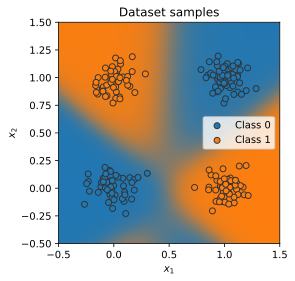

In [37]:
visualize_classification(model, dataset.data, dataset.label)
plt.show()